## Rain Prediction –Weather forecasting

### Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

In [1]:
# Importing the necessary library

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv") # loading the dataet

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)       # will display all the rows and columns:

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(8425, 23)

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
#statistics for the object columns--

df.describe(include='O').T

,count,unique,top,freq
Date,8425,3004,2011-01-31,5
Location,8425,12,Melbourne,1622
WindGustDir,7434,16,N,713
WindDir9am,7596,16,N,906
WindDir3pm,8117,16,SE,813
RainToday,8185,2,No,6195
RainTomorrow,8186,2,No,6195


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## EDA

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

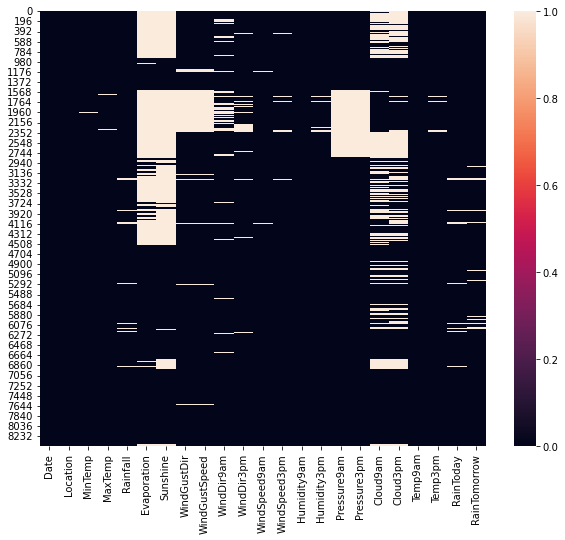

In [11]:
# Checking the null values using heatmap :
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

#### * We see a lot of null values in the dataset, we will deal with the null in the later stages:

In [13]:
# checking for numerical columns:

cont=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        cont.append(i)
        
print(cont)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
# Checking for categorical columns :

cat=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        cat.append(i)
        
print(cat)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [17]:
# Filling null values in MinTemp with it's mean:

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())


# Filling null values in MaxTemp with it's mean:

df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())


# Filling null values in Rainfall with it's mode, as most of the rows have 0 rainfall:

df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])


# Filling null values in Evaporation with it's mean:

df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())


# Filling null values in Sunshine with it's mean:

df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())


# Filling null values in WindGustDir with it's mode:

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])


# Filling null values in WindGustSpeed with it's mean:

df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())


# Filling null values in WindDir9am with it's mode:

df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])


#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

# Filling null values in WindSpeed9am with it's mean:

df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())


# Filling null values in WindSpeed3pm with it's mean:

df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())


# Filling null values in Humidity9am with it's mean:

df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())


# Filling null values in Humidity3pm with it's mean:

df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())


# Filling null values in Pressure9am with it's mean:

df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())


# Filling null values in Pressure3pm with it's mean:

df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())


# Filling null values in Cloud9am with it's mean:

df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())


# Filling null values in Cloud3pm with it's mean:

df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())


# Filling null values in Temp9am with it's mean:

df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())


# Filling null values in Temp3pm with it's mean:

df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())


# Filling null values in RainToday with it's mode:

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])


# Filling null values in RainTomorrow with it's mode:

df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
# Extracting Day from Date column:

df['Day'] = pd.to_datetime(df.Date,format="%Y/%m/%d").dt.day


# Extracting Month from Date column:

df['Month'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.month


# Extracting Year from Date column:

df['Year'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.year

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [22]:
# Dropping the Date column:

df.drop(columns=['Date'],axis=1,inplace=True)

In [23]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


### Univariate Analysis

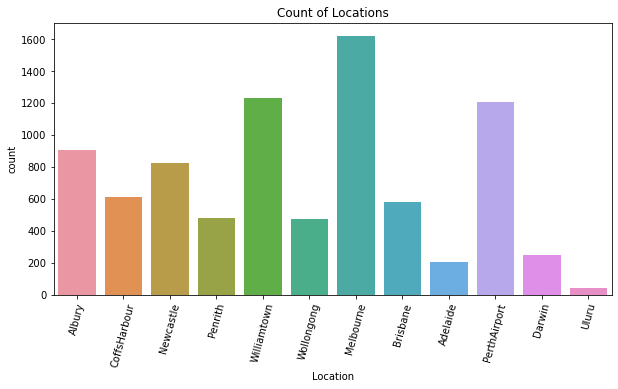

In [24]:
# Visualizing the various Locations present in the dataset:

plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

#### * The highest rainfall recorded was in Melbourne and least was recorded in Uluru.

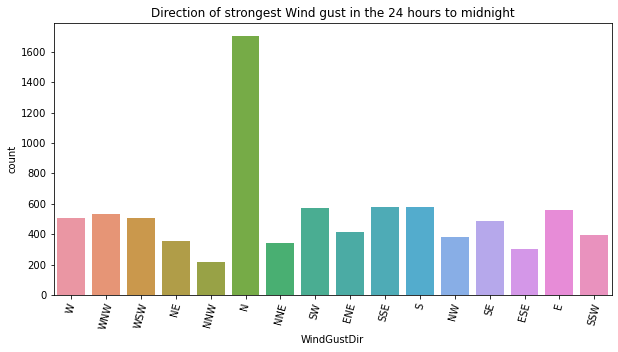

In [25]:
# WindGustDir

plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Direction of strongest Wind gust in the 24 hours to midnight")
plt.xticks(rotation=75)
plt.show()

#### * We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S,WNW

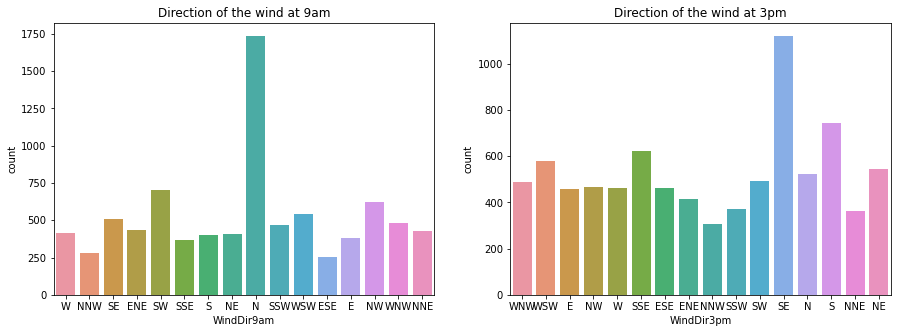

In [30]:
# wind at 9 am and 3pm:

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

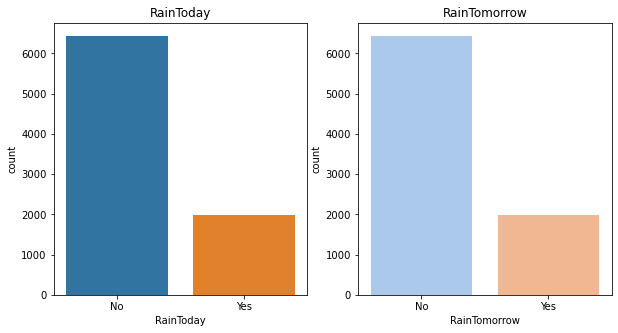

In [31]:
#Visualization of Rainfall today and tomorrow:

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'])
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

#### * There is not much difference in rain today and rain tomorrow

In [32]:
# checking for numerical columns:

cont1=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        cont1.append(i)
        
print(cont1)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [33]:
# Checking for categorical columns :

cat1=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        cat1.append(i)
        
print(cat1)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


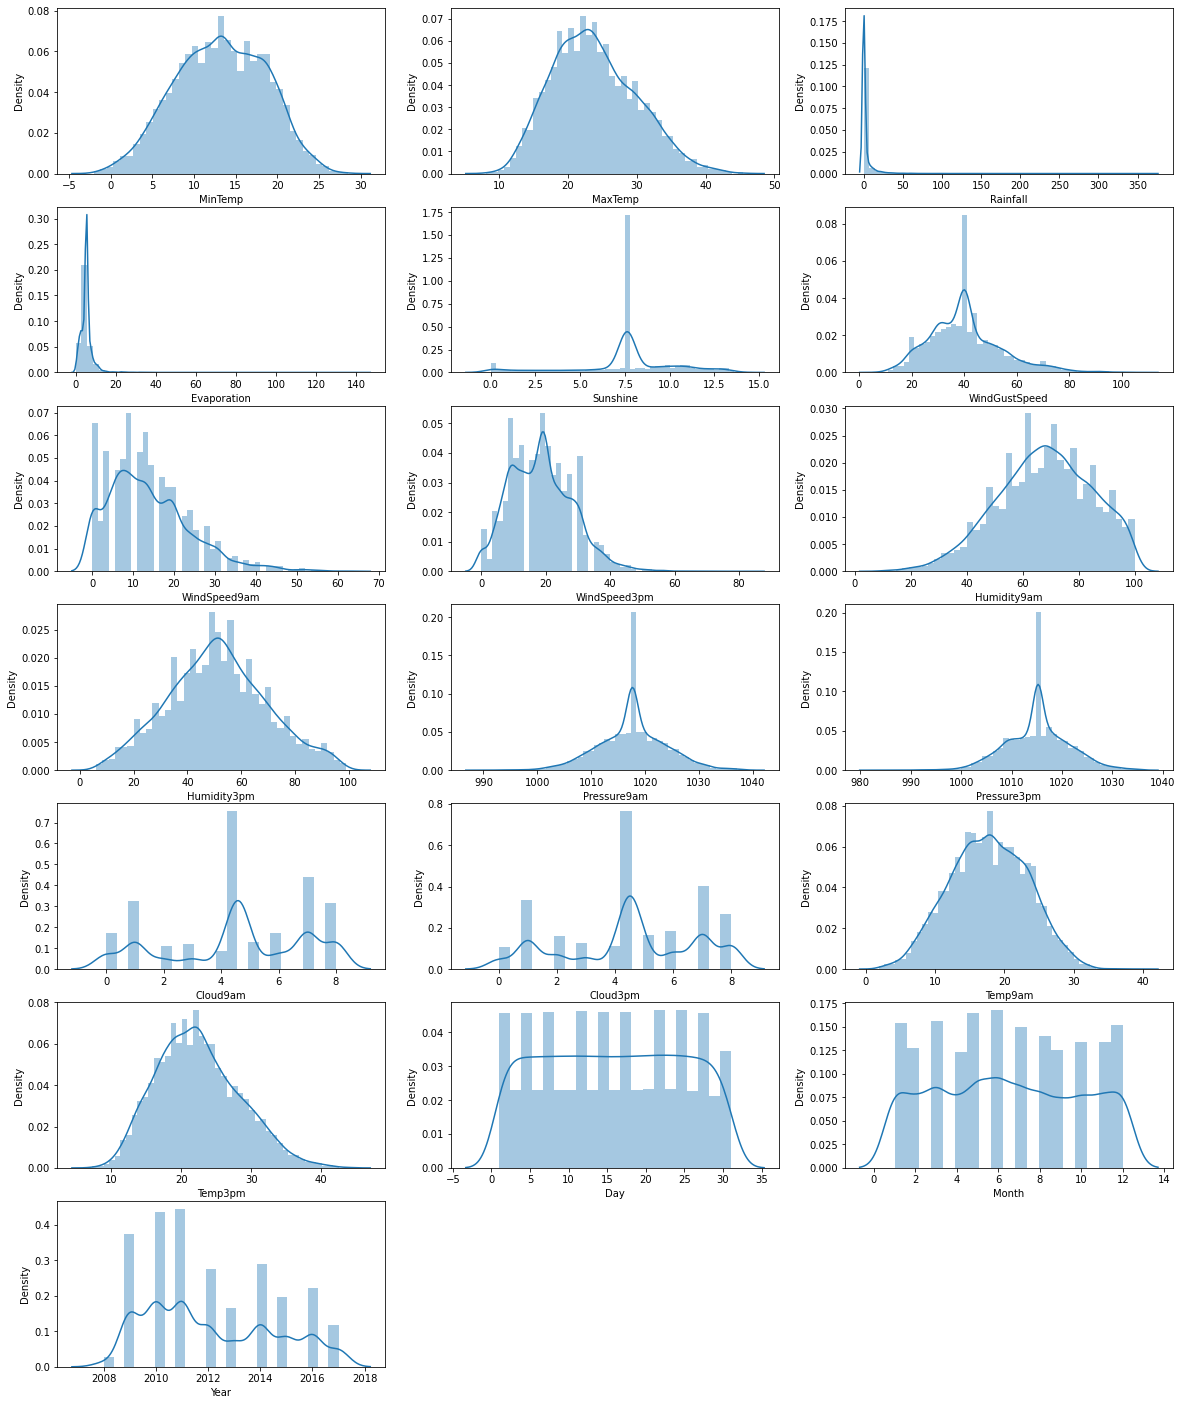

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for columns in cont1:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.show()

### From the graphs we can say that the dataset is not normally distributed.

#### * Min Temp is almost normally distributed

#### * Max Temp is slightly skewed right

#### * Rainfall is skewed right

#### * Evaporation is skewed right

#### * Sunshine is not normally distributed

#### * WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

#### * Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

#### * Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

## Bivariate Analysis :

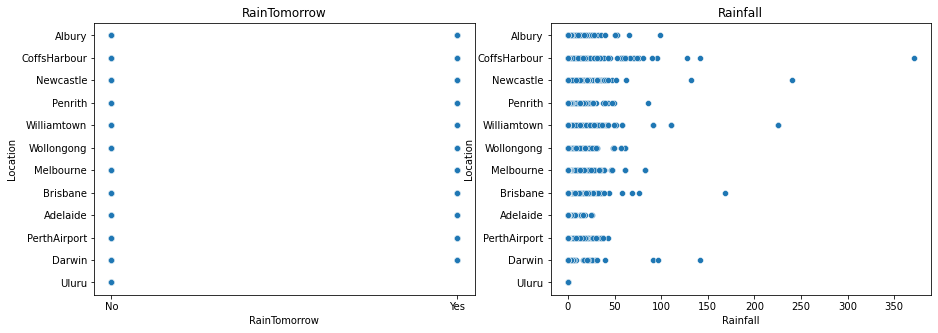

In [35]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

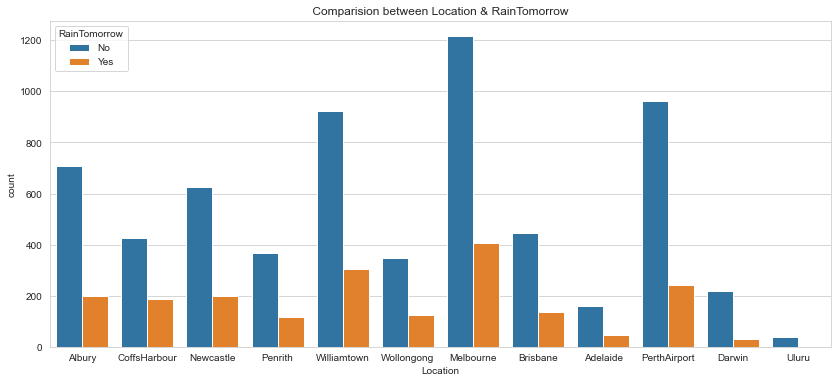

In [36]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='Location',hue='RainTomorrow',data=df)
plt.title(" Comparision between Location & RainTomorrow ")
plt.show()

#### * Melbourne has the highest chance of no rainfall tomorrow, but in general location does not effect the chances of rainfall

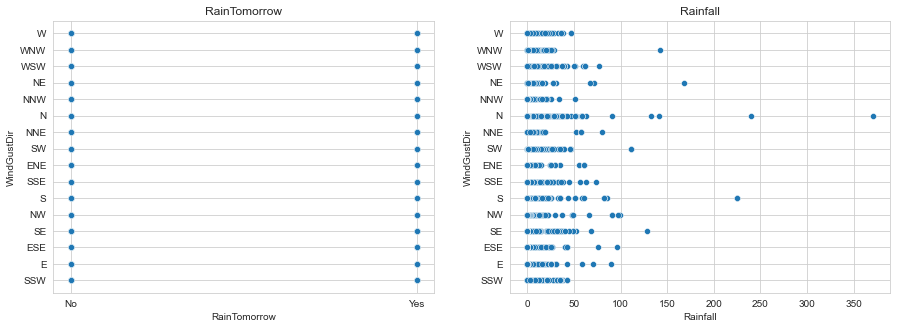

In [37]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow):

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

#### * From the above graph we conclude that there is not much relation between WindGustDir and Rain Tomorrow and rainfall

<AxesSubplot:xlabel='WindDir9am', ylabel='RainTomorrow'>

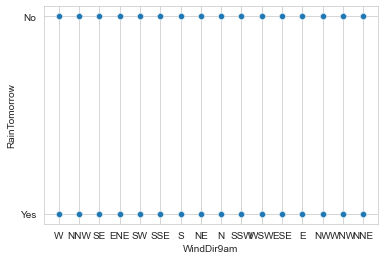

In [39]:
fig=plt.plot(figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow:

sns.scatterplot(x='WindDir9am',y='RainTomorrow',data=df)

#### * No Clear relationship can be established from the above graph

<AxesSubplot:xlabel='WindDir3pm', ylabel='RainTomorrow'>

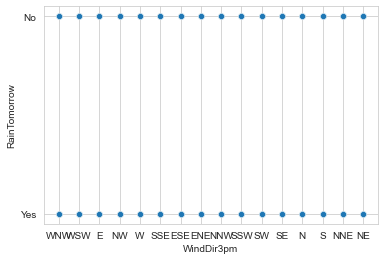

In [41]:
#checking the relation between WindDir3pm and RainTomorrow:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',data=df)

#### * No Clear relationship can be established from the above graph 

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

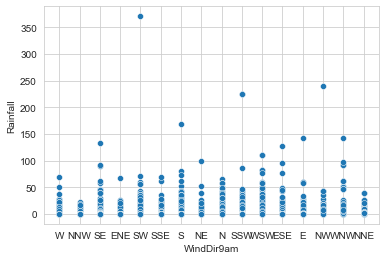

In [42]:
#checking the relation between WindDir9am and Rainfall:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='WindDir9am',y='Rainfall',data=df)

#### * No Clear relationship can be established from the above graph

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

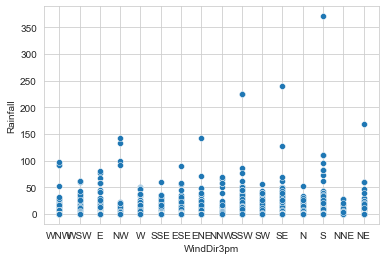

In [43]:
#checking the relation between WindDir3pm and Rainfall:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='WindDir3pm',y='Rainfall',data=df)

#### * No Clear relationship can be established from the above graph

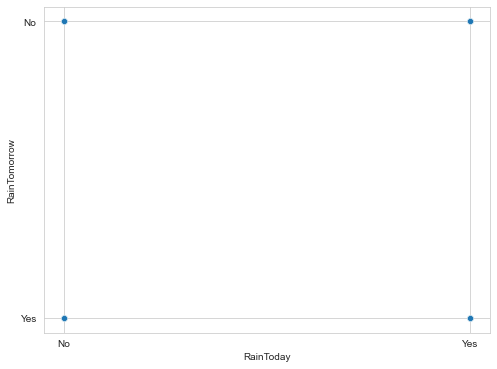

In [44]:
# Checking the relation between Rainfall today and Rainfall Tomorrow

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

#### * No Clear relationship can be established from the above graph 

<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

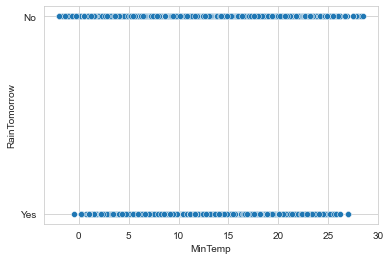

In [45]:
#checking the relation between minimum temperature and RainTomorrow:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='MinTemp',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='RainTomorrow'>

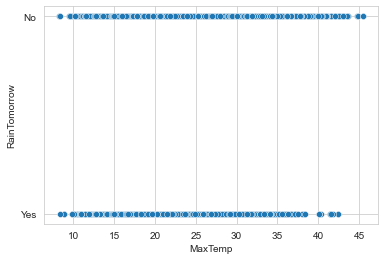

In [46]:
#checking the relation between max temperature and RainTomorrow

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='MaxTemp',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

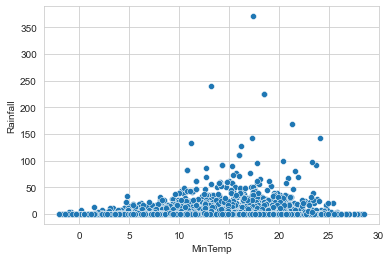

In [47]:
#checking the relation between minimum temperature and Rainfall:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='MinTemp',y='Rainfall',data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

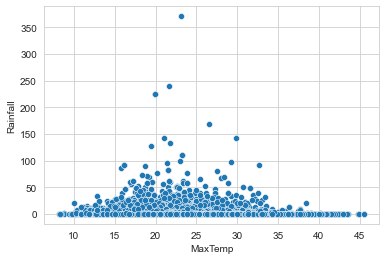

In [48]:
#checking the relation between max temperature and Rainfall:

fig=plt.plot(figsize=(15,10))
sns.scatterplot(x='MaxTemp',y='Rainfall',data=df)

#### * From the 4 graphs plotted avove We can clearly see that there is no linear relation of max temp and min temp with both the targets i.e Rain Tommorow and Rainfall.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

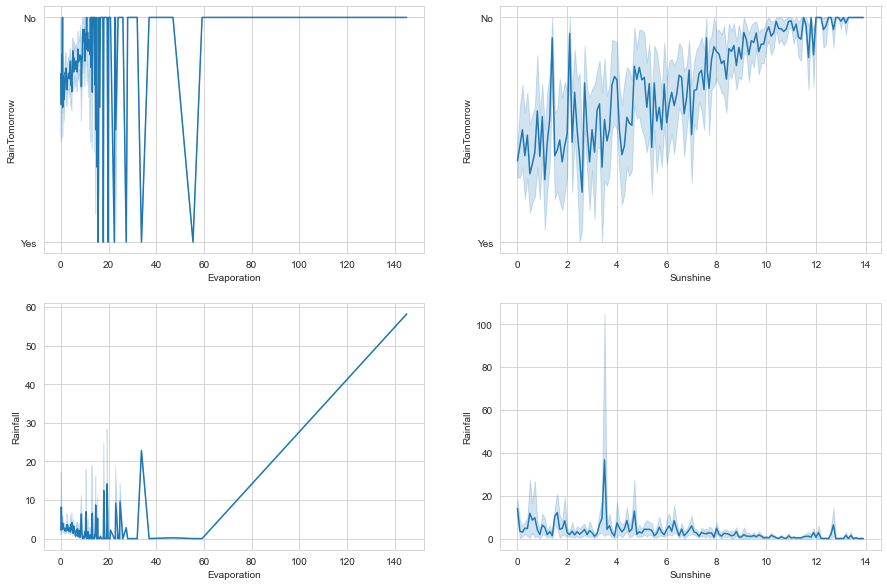

In [50]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],data=df)

#### * From the 4 graphs plotted avove We can clearly see that there is no linear relation of Evaporation and Sunshine with both the targets i.e Rain Tommorow and Rainfall. 

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

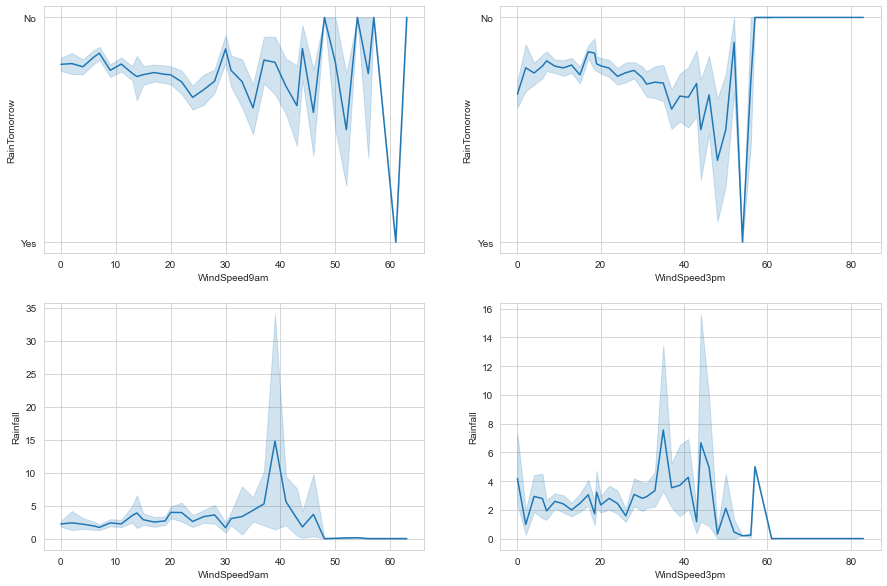

In [51]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],data=df)

####  * From the 4 graphs plotted avove We can clearly see that there is no linear relation of wind speed 9 am and wind speed 3pm with both the targets i.e Rain Tommorow and Rainfall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

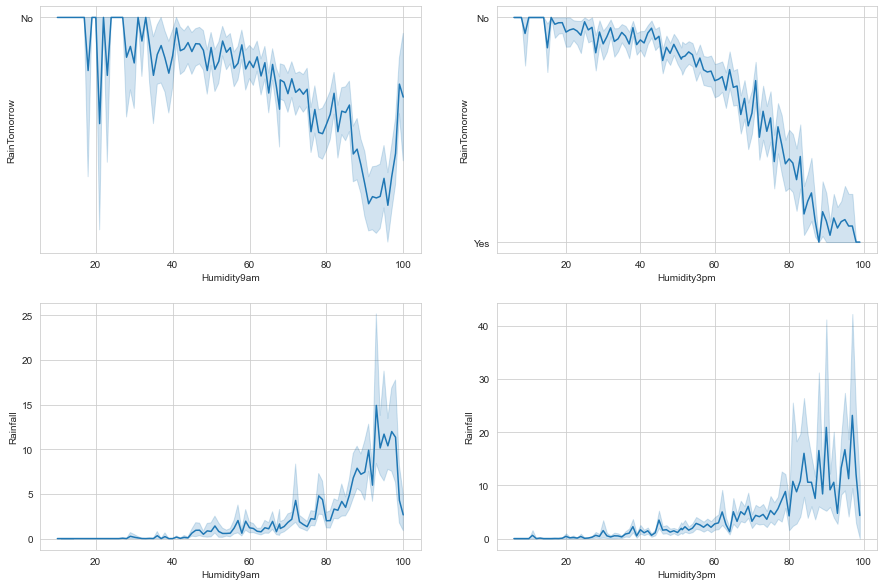

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],data=df)

####  * From the 4 graphs plotted avove We can conclude that there is  a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall.

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

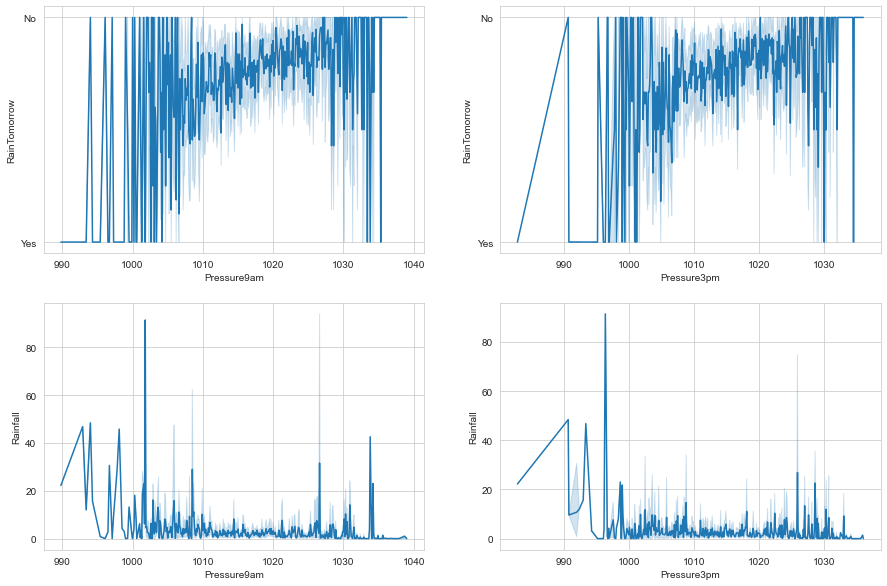

In [53]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],data=df)

#### * From the 4 graphs plotted avove We can clearly see that there is no linear relation of pressure 9 am and pressure 3pm with both the targets i.e Rain Tommorow and Rainfall.

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

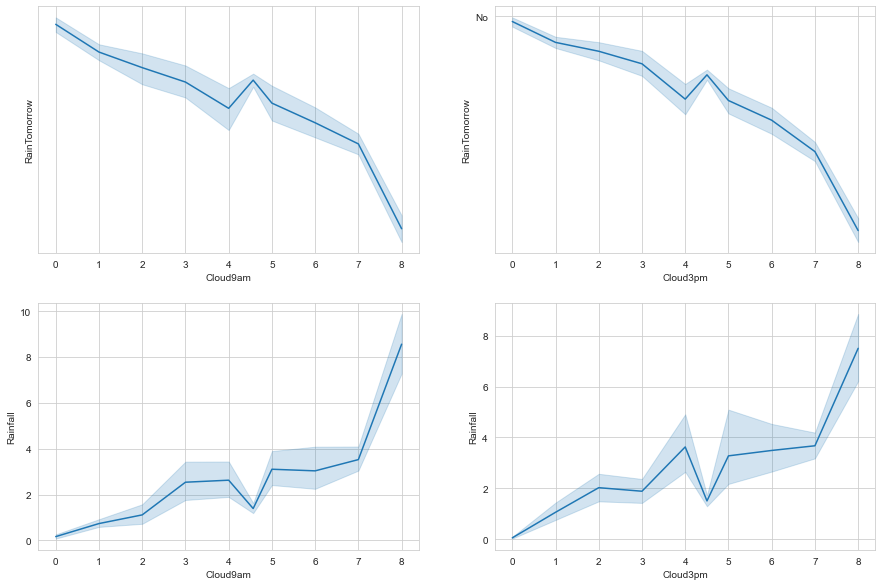

In [54]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],data=df)

#### * From the above graph we can conclude that The graphs shows a linear relationship and inverse relation between cloud and rain tomorrow and a positive relation between cloud and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

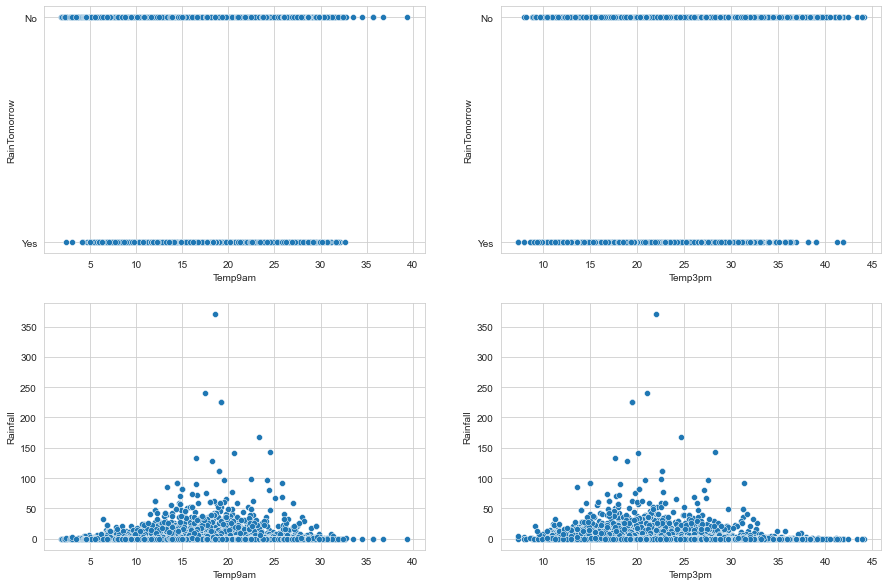

In [55]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],data=df)

#### * From the 4 graphs plotted avove We can clearly see that there is no linear relation of temp 9 am and temp 3pm with both the targets i.e Rain Tommorow and Rainfall.

### * Encoding using LabelEncoder :

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [60]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


### Outliers

In [63]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

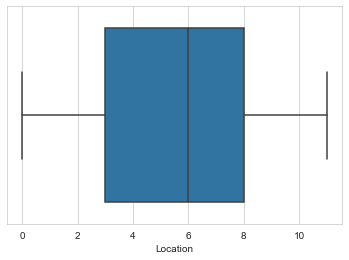

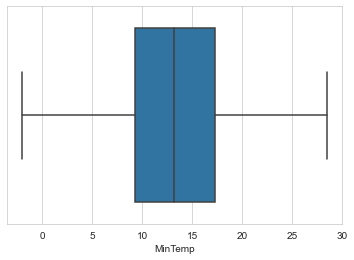

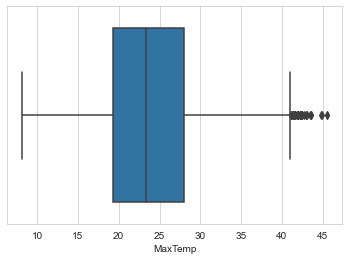

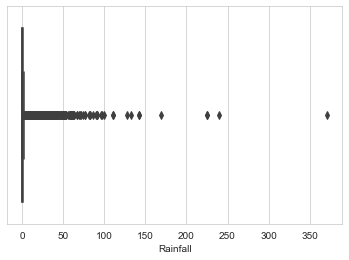

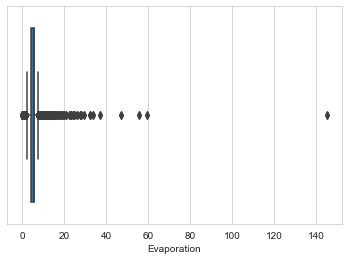

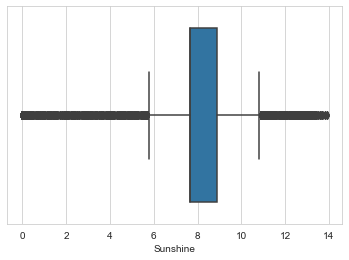

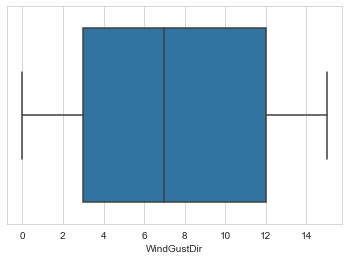

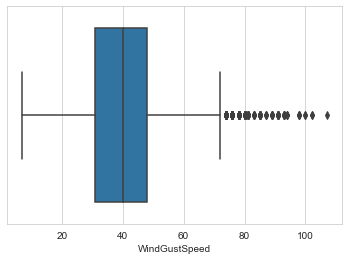

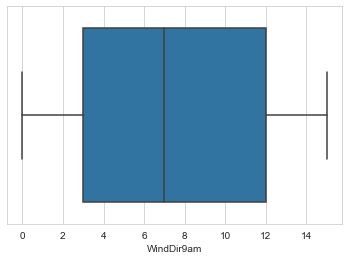

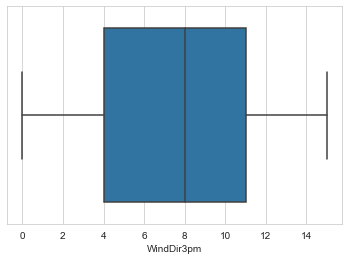

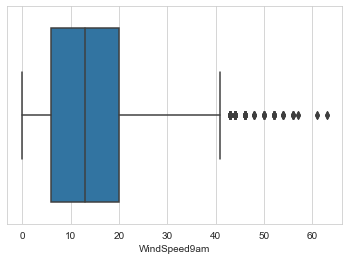

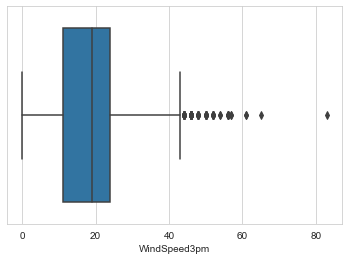

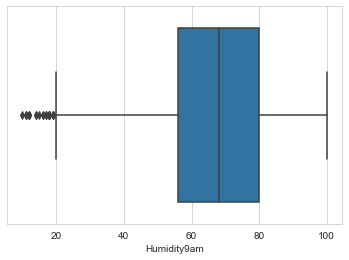

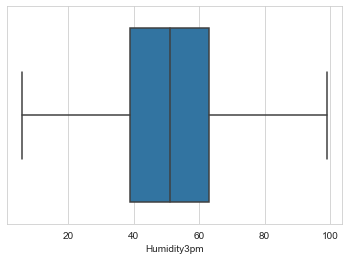

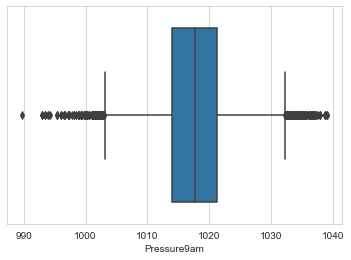

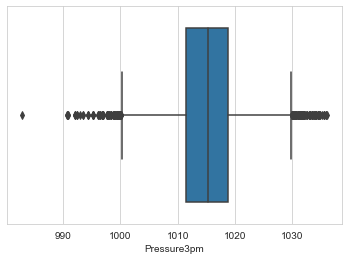

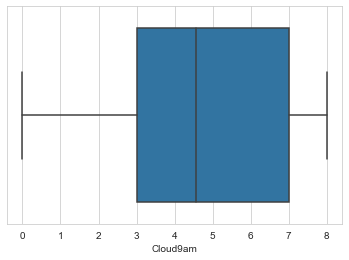

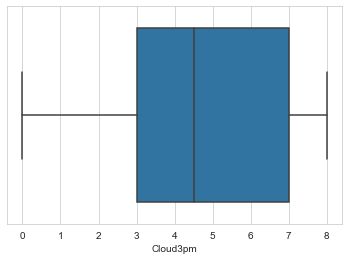

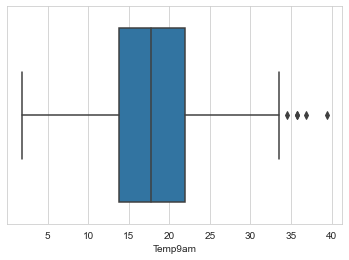

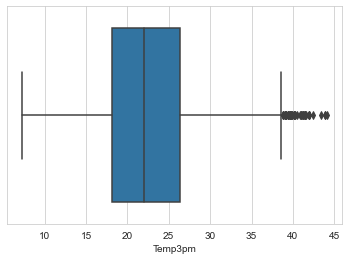

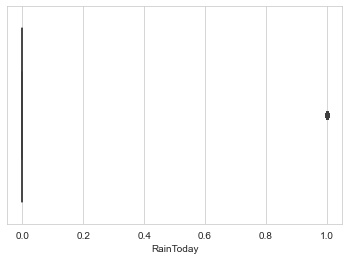

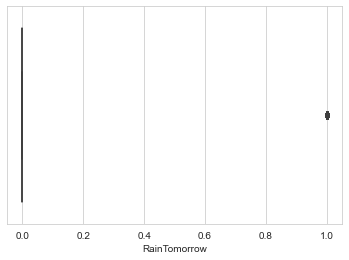

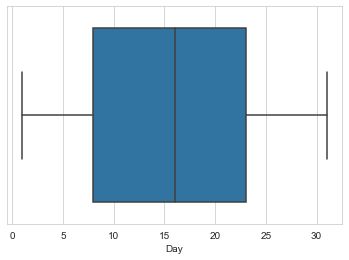

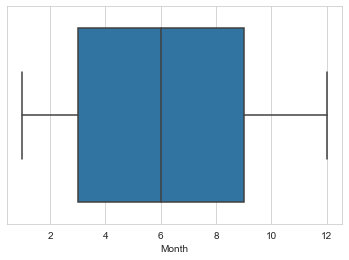

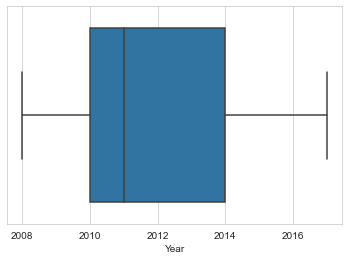

In [62]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

#### * From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm

### Outlier Removal:

In [65]:
continuous = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

In [67]:
from scipy.stats import zscore

z=np.abs(zscore(continuous))

In [69]:
# Creating new dataframe:

new_df = df[(z<3).all(axis=1)] 

new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [70]:
df.shape

(8425, 25)

In [71]:
new_df.shape

(7987, 25)

In [72]:
# Calculating the Data Loss :

Data_loss=((8425-7987)/8425)*100
Data_loss

5.198813056379822

In [73]:
# Data Loss is approx. 5%

### Skewness

In [75]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
WindDir3pm      -0.126255
MinTemp         -0.084549
Location        -0.040284
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
WindGustDir      0.112339
Humidity3pm      0.125150
WindDir9am       0.160081
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
RainTomorrow     1.296077
RainToday        1.301170
Rainfall         3.519090
dtype: float64

#### * We can see high skewness in Rainfall, Evaporation, Sunshine, WindGustSpeed & WindSpeed9am

### Skewness Removal using Power Transformer

In [76]:
df_skew=["Rainfall", "Evaporation", "Sunshine","WindGustSpeed","WindSpeed9am"]

In [77]:
from sklearn.preprocessing import PowerTransformer

scale = PowerTransformer(method='yeo-johnson')

In [78]:
new_df[df_skew] = scale.fit_transform(new_df[df_skew].values)

In [79]:
new_df[df_skew].skew()

Rainfall         1.040980
Evaporation      0.074744
Sunshine        -0.066262
WindGustSpeed    0.003128
WindSpeed9am    -0.111481
dtype: float64

### Checking Correlation 

In [80]:
new_df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.009958,0.131179,0.039174,-0.037707,0.256665,-0.041030,-0.031195,0.242265,0.231939,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.062858,0.372252,0.087866,-0.154935,0.248262,-0.045231,-0.154184,0.163453,0.185976,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.247298,0.472324,0.403083,-0.237955,0.150891,-0.217160,-0.190417,0.021640,0.093241,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.009958,0.062858,-0.247298,1.000000,-0.191915,-0.258805,0.134018,0.074165,0.155777,0.120945,0.025026,0.019706,0.405785,0.386152,-0.103844,-0.026453,0.301263,0.267605,-0.109492,-0.257653,0.932866,0.315988,-0.017966,-0.004576,0.004201
Evaporation,0.131179,0.372252,0.472324,-0.191915,1.000000,0.389848,-0.121155,0.184559,-0.109834,-0.038439,0.084657,0.091522,-0.315357,-0.227184,-0.263061,-0.277819,-0.111289,-0.144923,0.440687,0.458644,-0.167131,-0.090305,0.010870,-0.053227,0.136797
Sunshine,0.039174,0.087866,0.403083,-0.258805,0.389848,1.000000,-0.112272,0.031188,-0.082335,-0.073518,0.027018,0.062445,-0.392096,-0.439592,-0.012336,-0.074037,-0.543857,-0.555038,0.285620,0.418462,-0.223070,-0.315207,0.004631,0.001092,0.024638
WindGustDir,-0.037707,-0.154935,-0.237955,0.134018,-0.121155,-0.112272,1.000000,0.001046,0.405681,0.507292,0.080254,0.108357,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.256665,0.248262,0.150891,0.074165,0.184559,0.031188,0.001046,1.000000,-0.065546,0.082824,0.538658,0.632686,-0.274938,-0.087182,-0.373717,-0.331655,0.007757,0.059312,0.219017,0.116454,0.076276,0.172749,-0.005556,0.047451,-0.024871
WindDir9am,-0.041030,-0.045231,-0.217160,0.155777,-0.109834,-0.082335,0.405681,-0.065546,1.000000,0.243622,0.140316,0.058887,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.120945,-0.038439,-0.073518,0.507292,0.082824,0.243622,1.000000,0.041564,0.079716,-0.007820,-0.009385,-0.129842,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


In [82]:
new_df.corr()['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.932866
Humidity9am      0.405785
Humidity3pm      0.386152
RainTomorrow     0.315988
Cloud9am         0.301263
Cloud3pm         0.267605
WindDir9am       0.155777
WindGustDir      0.134018
WindDir3pm       0.120945
WindGustSpeed    0.074165
MinTemp          0.062858
WindSpeed9am     0.025026
WindSpeed3pm     0.019706
Location         0.009958
Year             0.004201
Month           -0.004576
Day             -0.017966
Pressure3pm     -0.026453
Pressure9am     -0.103844
Temp9am         -0.109492
Evaporation     -0.191915
MaxTemp         -0.247298
Temp3pm         -0.257653
Sunshine        -0.258805
Name: Rainfall, dtype: float64

In [83]:
new_df.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.315988
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.172749
MinTemp          0.091021
WindSpeed9am     0.057062
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.090305
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.315207
Name: RainTomorrow, dtype: float64

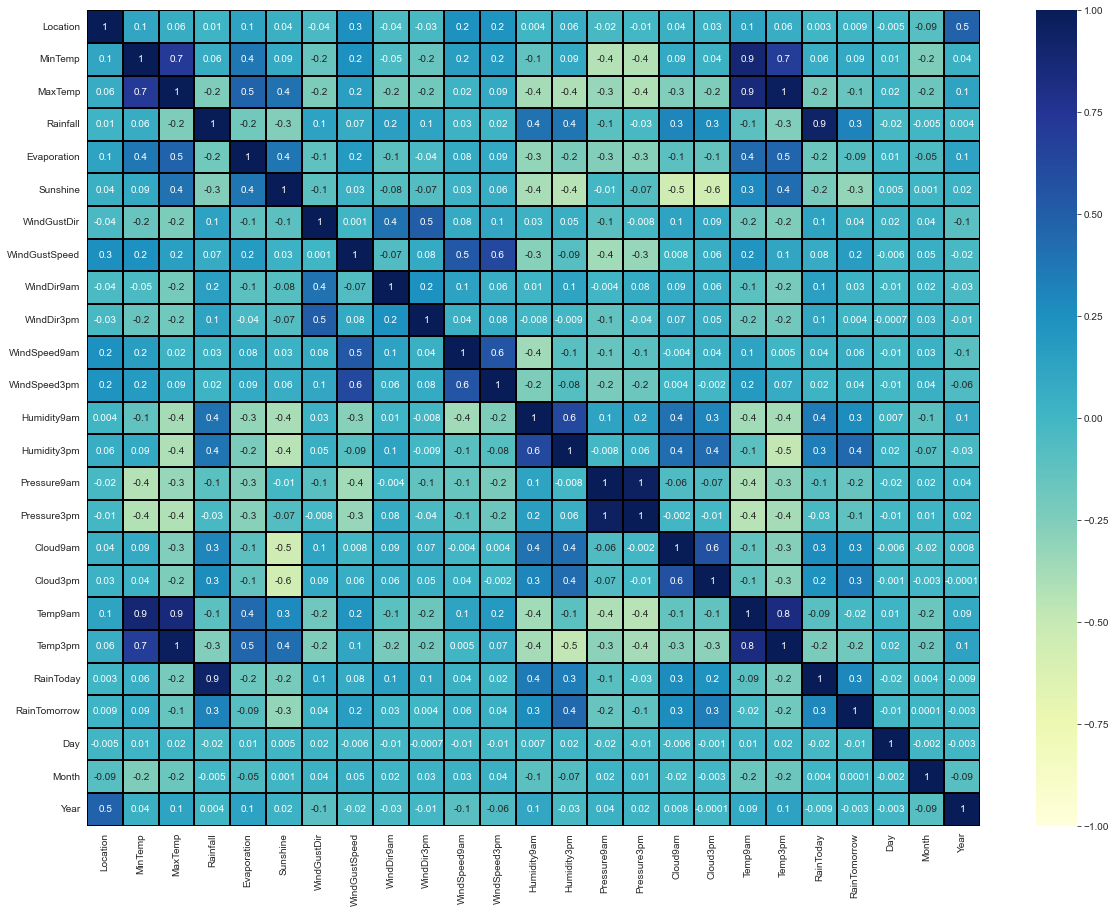

In [84]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

#### * From the above correlation heat map, we see that there is very high correlation between the different variables apart from our target variables, which might lead to  multicollinearity problems.

### RainTomorrow

#### * Humidity3pm, Cloud3pm, Rainfall & RainToday are highly positively correlated with RainTomorrow.
#### * Sunshine & Temp3pm are highly negatively correlated with RainTomorrow

### Rainfall


#### * RainToday, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm & RainTomorrow, are higly positively correlated with our target Rainfall.

#### * Temp3pm, Sunshine, MaxTemp & Evaporation are highly negatively correlated with our target Rainfall

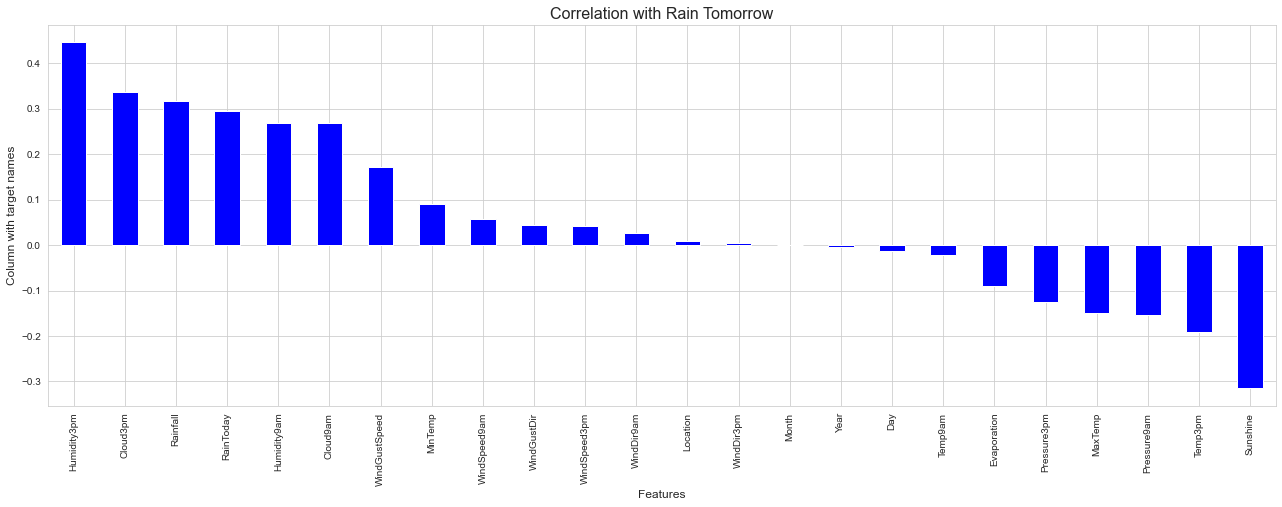

In [86]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation with Rain Tomorrow',fontsize=16)
plt.show()

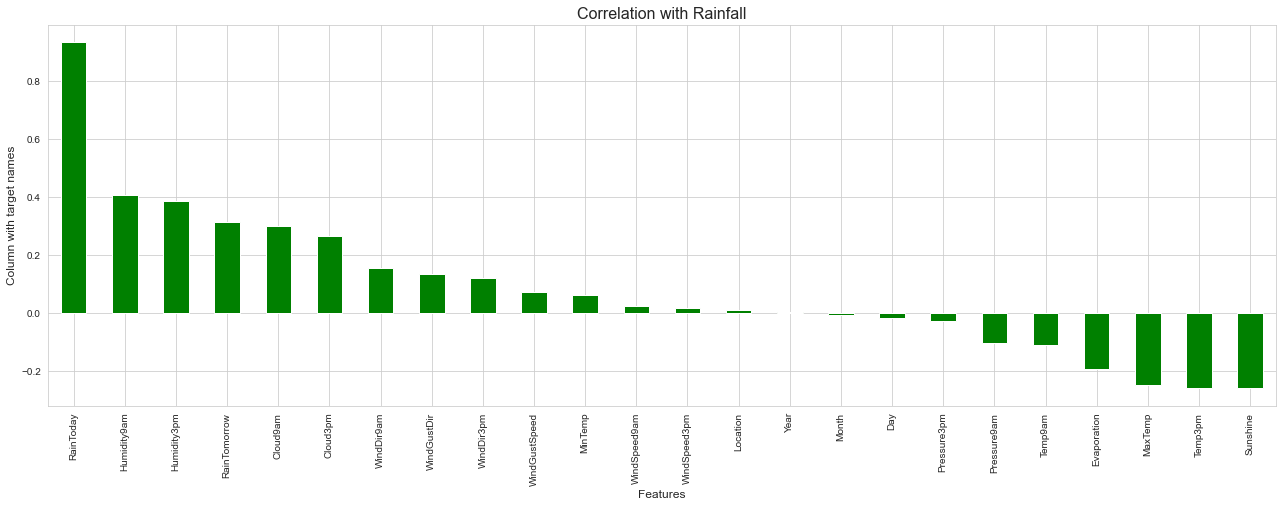

In [87]:
plt.figure(figsize=(22,7))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation with Rainfall',fontsize=16)
plt.show()

## Model Building (Regression : "Rainfall")

### Splitting the dataset into features and targets

In [88]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

In [89]:
x.shape, y.shape

((7987, 24), (7987,))

### Scaling the dataset using StandardScaler:

In [90]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)

x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.186311,-0.097439,1.229267,0.433926,1.250245,1.400214,0.784361,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.186311,-0.097439,1.441960,0.433926,-0.277857,1.626597,-0.983463,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.186311,-0.097439,1.654654,0.579399,1.250245,1.626597,0.700314,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.186311,-0.097439,-0.684977,-1.257142,0.377044,-1.769138,-0.063397,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.186311,-0.097439,1.229267,0.209370,-1.369358,-0.184462,-0.541317,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315


### Checking VIF

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.599570
1,MinTemp,8.831144
2,MaxTemp,26.369743
3,Evaporation,1.565143
4,Sunshine,2.074070
5,WindGustDir,1.620401
6,WindGustSpeed,2.337419
7,WindDir9am,1.363173
8,WindDir3pm,1.489712
9,WindSpeed9am,1.982144


#### * There are high VIF values present in columns : Temp3pm, MaxTemp, Pressure9am, Pressure3pm & Temp9am. We shall drop them in ascending order of the VIF scores until Multicollinerarity is within 10

In [92]:
# Dropping high VIF columns:

x.drop("Temp3pm",axis=1,inplace=True)

In [93]:
# Checking the VIF again:

vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.598796
1,MinTemp,8.791140
2,MaxTemp,9.650882
3,Evaporation,1.564256
4,Sunshine,2.074061
5,WindGustDir,1.617061
6,WindGustSpeed,2.328002
7,WindDir9am,1.362263
8,WindDir3pm,1.488753
9,WindSpeed9am,1.982119


In [94]:
# Dropping high VIF column:

x.drop("Pressure9am",axis=1,inplace=True)

In [95]:
# Checking the VIF again:

vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.598794
1,MinTemp,8.673335
2,MaxTemp,9.257843
3,Evaporation,1.544220
4,Sunshine,2.063976
5,WindGustDir,1.602122
6,WindGustSpeed,2.303150
7,WindDir9am,1.340048
8,WindDir3pm,1.421194
9,WindSpeed9am,1.979337


In [96]:
# Dropping high VIF column :

x.drop("Temp9am",axis=1,inplace=True)

In [97]:
# Again checking the VIF :

vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.596382
1,MinTemp,4.523566
2,MaxTemp,5.498156
3,Evaporation,1.537762
4,Sunshine,2.054459
5,WindGustDir,1.600247
6,WindGustSpeed,2.266417
7,WindDir9am,1.339912
8,WindDir3pm,1.420852
9,WindSpeed9am,1.956334


#### * Now, the multicoolinearity problem has been dealt with and we are good to proceed further with the modeling :

### Best Random State

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [102]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_rs=lr.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.8987707158127027  on Random State : 24


In [103]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24 )

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
# checking the shape of x_train, x_test, y_train, y_test

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5990, 21), (1997, 21), (5990,), (1997,))

In [107]:
# Defining the function for models:

def fun(instance, x_train, y_train, x_test, y_test):
    instances = instance.fit(x_train,y_train)
    train_pred = instances.predict(x_train)
    test_pred = instances.predict(x_test)
    print('r2_score', r2_score(y_test, test_pred))
    print('Mean squared error:',mean_squared_error(y_test,test_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, test_pred)))
    print('cross_val_score',cross_val_score(instances,x,y))
    print('cross_val_score Mean',cross_val_score(instances,x,y).mean())

### LinearRegression

In [108]:
model1 = LinearRegression()
fun(model1, x_train, y_train, x_test, y_test)

r2_score 0.8987707158127027
Mean squared error: 0.10210289241733449
Root mean squared error: 0.3195354321782398
cross_val_score [0.89157591 0.85114951 0.87354497 0.89123401 0.8868171 ]
cross_val_score Mean 0.8788642988006881


### XGBoostRegressor

In [109]:
model2 = XGBRegressor()
fun(model2, x_train, y_train, x_test, y_test)

r2_score 0.9145836196397061
Mean squared error: 0.08615352330723675
Root mean squared error: 0.2935192043244134
cross_val_score [0.86214744 0.87630832 0.92392684 0.90929188 0.85443082]
cross_val_score Mean 0.8852210606269552


### SVR

In [110]:
from sklearn.svm import SVR

model3 = SVR()

fun(model3, x_train,y_train, x_test, y_test)

r2_score 0.8991002434645272
Mean squared error: 0.101770520943478
Root mean squared error: 0.3190149227598577
cross_val_score [0.87372714 0.85543145 0.88290049 0.89488573 0.86193454]
cross_val_score Mean 0.8737758701377206


### AdaBoostRegreesor

In [111]:
from sklearn.ensemble import AdaBoostRegressor

model4 = AdaBoostRegressor()

fun(model4, x_train, y_train, x_test, y_test)

r2_score 0.8594368839673145
Mean squared error: 0.141776175040182
Root mean squared error: 0.37653177162117674
cross_val_score [0.86646516 0.83713144 0.84536134 0.8603984  0.85510743]
cross_val_score Mean 0.845067451161929


### GradientBoostingRegressor 

In [112]:
model5 = GradientBoostingRegressor()

fun(model5, x_train, y_train, x_test, y_test)

r2_score 0.9046872302452409
Mean squared error: 0.09613531849402847
Root mean squared error: 0.31005696007996414
cross_val_score [0.88955981 0.85858445 0.88478986 0.89863625 0.88653666]
cross_val_score Mean 0.8834879390793713


### Ridge

In [113]:
model6 = Ridge()
fun(model6, x_train, y_train, x_test, y_test)

r2_score 0.8987680917255821
Mean squared error: 0.10210553915031409
Root mean squared error: 0.3195395736842529
cross_val_score [0.89157824 0.85115256 0.87353949 0.89122897 0.8868185 ]
cross_val_score Mean 0.8788635520046201


### BaggingRegressor

In [114]:
from sklearn.ensemble import BaggingRegressor

model7 = BaggingRegressor()

fun(model7, x_train, y_train, x_test, y_test)

r2_score 0.9155656820406383
Mean squared error: 0.08516298571256245
Root mean squared error: 0.2918269790690409
cross_val_score [0.87461126 0.87133508 0.91536908 0.90945207 0.86133376]
cross_val_score Mean 0.8849265643225153


### RandomForestRegressor 

In [115]:
from sklearn.ensemble import RandomForestRegressor

model8 = RandomForestRegressor()

fun(model8, x_train, y_train, x_test, y_test)

r2_score 0.9207973310131023
Mean squared error: 0.07988618763491899
Root mean squared error: 0.28264144712854655
cross_val_score [0.88141817 0.88078654 0.92563888 0.91829515 0.87729282]
cross_val_score Mean 0.896533023060235


### ExtraTreeRegressor

In [117]:
from sklearn.ensemble import ExtraTreesRegressor

model9 = ExtraTreesRegressor()

fun(model9, x_train, y_train, x_test, y_test)

r2_score 0.9236841987824139
Mean squared error: 0.07697440621080331
Root mean squared error: 0.27744261787044056
cross_val_score [0.88220271 0.88888394 0.94142803 0.92554726 0.88216968]
cross_val_score Mean 0.9036376360417187


### From the above models we decide ExtraTreeRegressor i.e model9 to be our best model. Let's go ahead and try to tune it.

## HyperParameter Tunning

In [118]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

In [119]:
xtr = ExtraTreesRegressor()

In [121]:
params = {'n_estimators':[10,20,50,100,125], 'criterion':['friedman_mse','squared_error','poisson'],
          'max_depth':[5,10,15], 'min_samples_split':[2,3,4,5], 'min_samples_leaf':[1,2,3,4,5],
          'max_features':['sqrt', 'log2', None]}

In [122]:
grid_search = GridSearchCV(estimator = xtr,
                          param_grid = params,
                          cv=5,n_jobs=-1)

In [123]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'poisson'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100, 125]})

In [124]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [154]:
xtr1 = ExtraTreesRegressor(n_estimators= 100,criterion= 'friedman_mse',
                            max_depth=15,min_samples_split=2,min_samples_leaf =1)

xtr1.fit(x_train,y_train)

ExtraTreesRegressor(criterion='friedman_mse', max_depth=15)

In [148]:
model10 = xtr1

fun(model10, x_train, y_train, x_test, y_test)

r2_score 0.9229028635271324
Mean squared error: 0.07776248438553668
Root mean squared error: 0.2788592555134878
cross_val_score [0.8805461  0.88810376 0.94034209 0.92702441 0.8806663 ]
cross_val_score Mean 0.903740426471289


### * After HyperParameter Tunning our Model accuracy has come out to be 92.3 and model cv_score as 90.4.

### Saving the model

In [156]:
import joblib
joblib.dump(model10,"Rainfall_Prediction.pkl")

['Rainfall_Prediction.pkl']

### * Prediction

In [157]:
# Loading the saved model
Rainfall_Model=joblib.load("Rainfall_Prediction.pkl")

# Prediction
prediction = Rainfall_Model.predict(x_test)
prediction

array([ 0.68321573, -0.64071145,  1.72893225, ..., -0.04277015,
       -0.64287608, -0.48402412])

In [158]:
pd.DataFrame([Rainfall_Model.predict(x_test)[:],y_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

## Model Building (Classification: "RainTomorrow")

In [159]:
x1 = new_df.drop("RainTomorrow",axis=1)
y1 = new_df["RainTomorrow"]

In [161]:
from sklearn.preprocessing import StandardScaler

scale1 = StandardScaler()
x1 = pd.DataFrame(scale1.fit_transform(x1), columns=x1.columns)
x1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.773058,0.186311,-0.097439,1.229267,0.433926,1.250245,1.400214,0.784361,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.654231,0.186311,-0.097439,1.441960,0.433926,-0.277857,1.626597,-0.983463,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.654231,0.186311,-0.097439,1.654654,0.579399,1.250245,1.626597,0.700314,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.654231,0.186311,-0.097439,-0.684977,-1.257142,0.377044,-1.769138,-0.063397,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,1.135607,0.186311,-0.097439,1.229267,0.209370,-1.369358,-0.184462,-0.541317,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315


### Checking VIF

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588879
1,MinTemp,8.835540
2,MaxTemp,26.397086
3,Rainfall,8.424691
4,Evaporation,1.570226
5,Sunshine,2.056236
6,WindGustDir,1.618038
7,WindGustSpeed,2.267630
8,WindDir9am,1.363192
9,WindDir3pm,1.491464


#### * There are high VIF values present in columns : Temp3pm, MaxTemp, Pressure9am, Pressure3pm & Temp9am. We shall drop them in ascending order of the VIF scores until Multicollinerarity is within 10.

In [163]:
# Dropping high VIF column:

x1.drop("Temp3pm",axis=1,inplace=True)

In [164]:
# Checking the VIF again :

vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588122
1,MinTemp,8.795609
2,MaxTemp,9.676889
3,Rainfall,8.424682
4,Evaporation,1.569341
5,Sunshine,2.056225
6,WindGustDir,1.614714
7,WindGustSpeed,2.258374
8,WindDir9am,1.362281
9,WindDir3pm,1.490502


In [165]:
# Dropping high VIF column:

x1.drop("Pressure9am",axis=1,inplace=True)

In [166]:
# Checking the VIF again :

vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588102
1,MinTemp,8.677476
2,MaxTemp,9.285655
3,Rainfall,8.409062
4,Evaporation,1.548627
5,Sunshine,2.047363
6,WindGustDir,1.600407
7,WindGustSpeed,2.238708
8,WindDir9am,1.340020
9,WindDir3pm,1.423060


In [167]:
# Dropping high VIF column:

x1.drop("Temp9am",axis=1,inplace=True)

In [168]:
# Checking the VIF again :

vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.585574
1,MinTemp,4.541537
2,MaxTemp,5.509210
3,Rainfall,8.403273
4,Evaporation,1.542442
5,Sunshine,2.037714
6,WindGustDir,1.598580
7,WindGustSpeed,2.200365
8,WindDir9am,1.339892
9,WindDir3pm,1.422666


#### * Now the Multicollinearity is removed and we are good to proceed further :

#### * Checking for data imbalance in the rahet column:

In [169]:
y1.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

### Dealing with the data imbalance using SMOTE

In [170]:
#Data Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x1, y1)

y_sm.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

In [171]:
# Now we are going to check the shape of x and y:

print(X_sm.shape,y_sm.shape)

(12330, 21) (12330,)


In [172]:
x1.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
RainToday        float64
Day              float64
Month            float64
Year             float64
dtype: object

In [173]:
y = y_sm

In [174]:
x = X_sm

In [175]:
x.shape, y.shape

((12330, 21), (12330,))

In [176]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.773058,0.186311,-0.097439,1.229267,0.433926,1.250245,1.400214,0.784361,0.638072,0.184123,-1.624174,-1.398115,1.425345,0.013138,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.654231,0.186311,-0.097439,1.441960,0.433926,-0.277857,1.626597,-0.983463,0.421555,-1.455097,-1.457752,-1.279988,0.011773,0.013138,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.654231,0.186311,-0.097439,1.654654,0.579399,1.250245,1.626597,0.700314,0.854590,-1.819368,-1.180382,-1.128109,0.011773,-1.076661,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.654231,0.186311,-0.097439,-0.684977,-1.257142,0.377044,-1.769138,-0.063397,-0.985811,-1.394385,-1.957019,-0.436219,0.011773,0.013138,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,1.135607,0.186311,-0.097439,1.229267,0.209370,-1.369358,-0.184462,-0.541317,0.205037,0.851954,-1.013959,-1.583744,1.013630,1.535531,-0.542476,-1.216936,1.634113,-1.661315


## Model Building :

### Finding the best Random State : 

In [177]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc,plot_roc_curve
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [178]:
maxAccu1=0
maxRS1=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_rs=lr.predict(x_test)
    acc=accuracy_score(y_test,pred_rs)
    if acc>maxAccu1:
        maxAccu1=acc
        maxRS1=i
print("Best accuracy is :",maxAccu1," on Random State :",maxRS1)

Best accuracy is : 0.7927343496594227  on Random State : 181


In [179]:
lr = LogisticRegression()

for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20, random_state =i)
    lr.fit(X_train, Y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(accuracy_score(Y_train, pred_train)*100,1)==round(accuracy_score(Y_test, pred_test)*100,1):
        print("At random state", i, "The model performs very well")
        print("At random state :- ", i)
        print("Training accuracy_score is :- ", round(accuracy_score(Y_train, pred_train)*100,1))
        print("Testing accuracy_score is :- ", round(accuracy_score(Y_test, pred_test)*100,1), '\n\n')

At random state 10 The model performs very well
At random state :-  10
Training accuracy_score is :-  77.7
Testing accuracy_score is :-  77.7 


At random state 30 The model performs very well
At random state :-  30
Training accuracy_score is :-  77.7
Testing accuracy_score is :-  77.7 


At random state 34 The model performs very well
At random state :-  34
Training accuracy_score is :-  77.8
Testing accuracy_score is :-  77.8 


At random state 56 The model performs very well
At random state :-  56
Training accuracy_score is :-  77.6
Testing accuracy_score is :-  77.6 


At random state 84 The model performs very well
At random state :-  84
Training accuracy_score is :-  77.7
Testing accuracy_score is :-  77.7 


At random state 100 The model performs very well
At random state :-  100
Training accuracy_score is :-  77.8
Testing accuracy_score is :-  77.8 


At random state 105 The model performs very well
At random state :-  105
Training accuracy_score is :-  77.7
Testing accuracy_sc

#### * Best Random State = 34

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 34)

In [181]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9247, 21), (3083, 21), (9247,), (3083,))

In [182]:
# Defining a function for model selection :

def func(instance, X_train, Y_train, X_test, Y_test):
    instances = instance.fit(X_train,Y_train)
    train_pred = instances.predict(X_train)
    test_pred = instances.predict(X_test)
    print('training confucion matrix',confusion_matrix(Y_train,train_pred))
    print('testing confucion matrix',confusion_matrix(Y_test,test_pred))
    print('test ',classification_report(Y_test, test_pred))
    print('training ',classification_report(Y_train, train_pred))
    print('cross_val_score',cross_val_score(instances,x, y))
    print('cross_val_score Mean',cross_val_score(instances,x, y).mean())

### KNeighborClassifier

In [183]:
model1 = KNeighborsClassifier()
func(model1, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3834  807]
 [  79 4527]]
testing confucion matrix [[1160  364]
 [  52 1507]]
test                precision    recall  f1-score   support

           0       0.96      0.76      0.85      1524
           1       0.81      0.97      0.88      1559

    accuracy                           0.87      3083
   macro avg       0.88      0.86      0.86      3083
weighted avg       0.88      0.87      0.86      3083

training                precision    recall  f1-score   support

           0       0.98      0.83      0.90      4641
           1       0.85      0.98      0.91      4606

    accuracy                           0.90      9247
   macro avg       0.91      0.90      0.90      9247
weighted avg       0.91      0.90      0.90      9247

cross_val_score [0.69059205 0.63868613 0.76885645 0.77899432 0.76277372]
cross_val_score Mean 0.7279805352798053


### DecisionTreeClassifier

In [184]:
model2 = DecisionTreeClassifier()
func(model2, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4641    0]
 [   0 4606]]
testing confucion matrix [[1302  222]
 [ 176 1383]]
test                precision    recall  f1-score   support

           0       0.88      0.85      0.87      1524
           1       0.86      0.89      0.87      1559

    accuracy                           0.87      3083
   macro avg       0.87      0.87      0.87      3083
weighted avg       0.87      0.87      0.87      3083

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4641
           1       1.00      1.00      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.61638281 0.6135442  0.87469586 0.83049473 0.69424169]
cross_val_score Mean 0.7315490673154906


### LogisticRegression

In [185]:
model3 = LogisticRegression()
func(model3, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3644  997]
 [1067 3539]]
testing confucion matrix [[1216  308]
 [ 371 1188]]
test                precision    recall  f1-score   support

           0       0.77      0.80      0.78      1524
           1       0.79      0.76      0.78      1559

    accuracy                           0.78      3083
   macro avg       0.78      0.78      0.78      3083
weighted avg       0.78      0.78      0.78      3083

training                precision    recall  f1-score   support

           0       0.77      0.79      0.78      4641
           1       0.78      0.77      0.77      4606

    accuracy                           0.78      9247
   macro avg       0.78      0.78      0.78      9247
weighted avg       0.78      0.78      0.78      9247

cross_val_score [0.70478508 0.66017843 0.65977291 0.73844282 0.83536091]
cross_val_score Mean 0.7197080291970803


### Bagging Regressor

In [186]:
model4 = BaggingClassifier()
func(model4, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4631   10]
 [  24 4582]]
testing confucion matrix [[1408  116]
 [ 165 1394]]
test                precision    recall  f1-score   support

           0       0.90      0.92      0.91      1524
           1       0.92      0.89      0.91      1559

    accuracy                           0.91      3083
   macro avg       0.91      0.91      0.91      3083
weighted avg       0.91      0.91      0.91      3083

training                precision    recall  f1-score   support

           0       0.99      1.00      1.00      4641
           1       1.00      0.99      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.62246553 0.60462287 0.89091646 0.86618005 0.80048662]
cross_val_score Mean 0.765206812652068


### SVC

In [187]:
model5 = SVC()
func(model5, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4029  612]
 [ 461 4145]]
testing confucion matrix [[1278  246]
 [ 194 1365]]
test                precision    recall  f1-score   support

           0       0.87      0.84      0.85      1524
           1       0.85      0.88      0.86      1559

    accuracy                           0.86      3083
   macro avg       0.86      0.86      0.86      3083
weighted avg       0.86      0.86      0.86      3083

training                precision    recall  f1-score   support

           0       0.90      0.87      0.88      4641
           1       0.87      0.90      0.89      4606

    accuracy                           0.88      9247
   macro avg       0.88      0.88      0.88      9247
weighted avg       0.88      0.88      0.88      9247

cross_val_score [0.71167883 0.63057583 0.75466342 0.79845904 0.81711273]
cross_val_score Mean 0.7424979724249796


### ExtraTreeClassifier

In [188]:
from sklearn.ensemble import ExtraTreesClassifier

model6 = ExtraTreesClassifier()
func(model6, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4641    0]
 [   0 4606]]
testing confucion matrix [[1422  102]
 [  73 1486]]
test                precision    recall  f1-score   support

           0       0.95      0.93      0.94      1524
           1       0.94      0.95      0.94      1559

    accuracy                           0.94      3083
   macro avg       0.94      0.94      0.94      3083
weighted avg       0.94      0.94      0.94      3083

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4641
           1       1.00      1.00      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.71532847 0.69059205 0.88848337 0.90227088 0.85077048]
cross_val_score Mean 0.8012165450121655


### XGBClassifier

In [189]:
from xgboost import XGBClassifier

model8 = XGBClassifier()
func(model8, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4634    7]
 [  32 4574]]
testing confucion matrix [[1438   86]
 [ 125 1434]]
test                precision    recall  f1-score   support

           0       0.92      0.94      0.93      1524
           1       0.94      0.92      0.93      1559

    accuracy                           0.93      3083
   macro avg       0.93      0.93      0.93      3083
weighted avg       0.93      0.93      0.93      3083

training                precision    recall  f1-score   support

           0       0.99      1.00      1.00      4641
           1       1.00      0.99      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.57137064 0.56082725 0.8649635  0.837794   0.70154096]
cross_val_score Mean 0.7072992700729928


### RandomForestClassifier

In [190]:
model9 = RandomForestClassifier()
func(model9, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4641    0]
 [   0 4606]]
testing confucion matrix [[1424  100]
 [ 102 1457]]
test                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1524
           1       0.94      0.93      0.94      1559

    accuracy                           0.93      3083
   macro avg       0.93      0.93      0.93      3083
weighted avg       0.93      0.93      0.93      3083

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4641
           1       1.00      1.00      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.63219789 0.64679643 0.88483374 0.89051095 0.85077048]
cross_val_score Mean 0.7849148418491485


## Plotting the ROC AUC curve

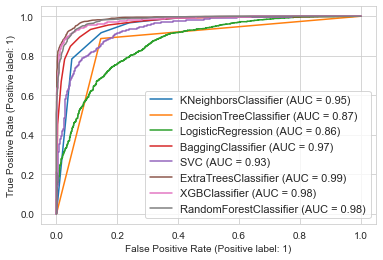

In [191]:
disp = plot_roc_curve(model1, X_test, Y_test)
plot_roc_curve(model2, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model3, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model4, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model5, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model6, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model8, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model9, X_test, Y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

#### * From the above we observe that accuracy, cv score & AUC of ExtraTreeClassifier is maximum, hence we consider it to be our best model and we shall now tune its hyperparameter to check if it gives better results.

## HyperParameter Tunning

### Tunning ExtraTreesClassifier 

In [192]:
clf1 = ExtraTreesClassifier()

In [193]:
params = {'max_depth' : (4,8,12,16), 'min_samples_split':(4,8,12,16),'criterion':['gini', 'entropy'], 
          'n_estimators' : [5,25,100,125], 'max_features':['sqrt', 'log2']}

In [194]:
grd1 = GridSearchCV(clf1, param_grid = params, n_jobs = -1)

grd1.fit(X_train, Y_train)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 8, 12, 16),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': (4, 8, 12, 16),
                         'n_estimators': [5, 25, 100, 125]})

In [195]:
print("Best Parameters =" ,grd1.best_params_)

Best Parameters = {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [196]:
xt_clf = ExtraTreesClassifier(max_depth = 16, min_samples_split = 4, 
                              criterion = 'gini', n_estimators = 120, max_features = 'sqrt', random_state = 34)

In [199]:
model11 = xt_clf
func(model11, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4641    0]
 [   0 4606]]
testing confucion matrix [[1421  103]
 [  69 1490]]
test                precision    recall  f1-score   support

           0       0.95      0.93      0.94      1524
           1       0.94      0.96      0.95      1559

    accuracy                           0.94      3083
   macro avg       0.94      0.94      0.94      3083
weighted avg       0.94      0.94      0.94      3083

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4641
           1       1.00      1.00      1.00      4606

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247

cross_val_score [0.67680454 0.67680454 0.88888889 0.90348743 0.84266018]
cross_val_score Mean 0.8039740470397405


#### * After HyperParameter tunning of the above models we conclude that ExtraTreeClassifier is our best model and its accuracy and cv score has increased.

### Saving the model after hyperparameter tunning

In [201]:
import joblib
joblib.dump(model6,"Rainfall_Prediction_Classification.pkl")

['Rainfall_Prediction_Classification.pkl']

### Prediction :

In [203]:
# Loading the saved model
Rainfall_Classification_Model=joblib.load("Rainfall_Prediction_Classification.pkl")

#Prediction
predictions = Rainfall_Classification_Model.predict(x_test)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [205]:
pd.DataFrame([Rainfall_Classification_Model.predict(x_test)[:],y_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# Thank you